# Question 2.
Build a machine learning model to predict whether a person makes over 50K a
year or not \
[https://drive.google.com/open?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import copy, math
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("classification_2.csv")
except Exception as e:
    print(f"Error : {e}")

## Data Analysis

Understanding the data before processing and fitting the model

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [4]:
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
df.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [6]:
df.isna().any()     # Checking for any missing values in the data

39                False
 State-gov        False
 77516            False
 Bachelors        False
 13               False
 Never-married    False
 Adm-clerical     False
 Not-in-family    False
 White            False
 Male             False
 2174             False
 0                False
 40               False
 United-States    False
 <=50K            False
dtype: bool

In [7]:
df.isnull().sum()   # Checking for any null values in the data

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [8]:
df.dtypes       # Understanding type of values in the data

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

## Data Preprocessing

In [9]:
df.shape

(32560, 15)

In [10]:
df.sample(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
18784,30,Private,140790,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
7086,45,Private,107682,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,>50K
25668,22,?,424494,Some-college,10,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K
21,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
29552,42,Private,79586,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
12895,37,Private,252947,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,1719,32,United-States,<=50K
3400,58,Private,78141,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
26418,27,Private,193898,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K
22044,24,Private,241185,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,48,United-States,<=50K
246,32,Private,183916,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,34,United-States,<=50K


In [11]:
df.columns = df.columns.str.strip()     # We are removing/stripping spaces in the column headers

In [12]:
df.rename(columns={'<=50K':'y'}, inplace=True)

In [13]:
df.sample(4)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,y
7947,47,Private,214702,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,37,Puerto-Rico,<=50K
8573,28,Federal-gov,329426,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
17308,20,Private,117109,Some-college,10,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,24,United-States,<=50K
18666,31,Private,126402,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Female,0,0,60,United-States,<=50K


In [14]:
# sn.swarmplot(df)

Removing the columns which have less effect on the outcome to maximize the accuracy of the model 

In [15]:
df = df.drop(['Never-married', 'Bachelors','Adm-clerical', 'Not-in-family', 'White', 'United-States', 'Male'], axis=1)

In [16]:
df.info

<bound method DataFrame.info of        39          State-gov   77516  13   2174  0  40       y
0      50   Self-emp-not-inc   83311  13      0  0  13   <=50K
1      38            Private  215646   9      0  0  40   <=50K
2      53            Private  234721   7      0  0  40   <=50K
3      28            Private  338409  13      0  0  40   <=50K
4      37            Private  284582  14      0  0  40   <=50K
...    ..                ...     ...  ..    ... ..  ..     ...
32555  27            Private  257302  12      0  0  38   <=50K
32556  40            Private  154374   9      0  0  40    >50K
32557  58            Private  151910   9      0  0  40   <=50K
32558  22            Private  201490   9      0  0  20   <=50K
32559  52       Self-emp-inc  287927   9  15024  0  40    >50K

[32560 rows x 8 columns]>

In [17]:
df.y = df.y.str.strip()

In [18]:
df.head(10)

,39,State-gov,77516,13,2174,0,40,y
0,50,Self-emp-not-inc,83311,13,0,0,13,<=50K
1,38,Private,215646,9,0,0,40,<=50K
2,53,Private,234721,7,0,0,40,<=50K
3,28,Private,338409,13,0,0,40,<=50K
4,37,Private,284582,14,0,0,40,<=50K
5,49,Private,160187,5,0,0,16,<=50K
6,52,Self-emp-not-inc,209642,9,0,0,45,>50K
7,31,Private,45781,14,14084,0,50,>50K
8,42,Private,159449,13,5178,0,40,>50K
9,37,Private,280464,10,0,0,80,>50K


> pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [19]:
df = pd.concat((df, pd.get_dummies(df['State-gov'])),1)
df = df.drop(['State-gov'],axis=1)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_32704\2775472956.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df, pd.get_dummies(df['State-gov'])),1)


In [20]:
df.head()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,13,0,0,13,<=50K,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,0,1,0,0,0,0


In [21]:
df.y = df.y.replace({'<=50K': 0, '>50K': 1})   # Replacing categories with numerical equivalent

In [22]:
df.sample(5)

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
28731,59,131916,9,0,0,40,1,0,0,0,0,1,0,0,0,0
21892,29,157262,14,0,0,45,0,0,0,0,0,1,0,0,0,0
10963,56,205601,16,99999,0,70,1,0,0,0,0,0,1,0,0,0
27428,17,218361,6,0,1602,12,0,0,0,0,0,1,0,0,0,0
15677,42,183765,13,0,0,50,0,0,0,0,0,0,0,1,0,0


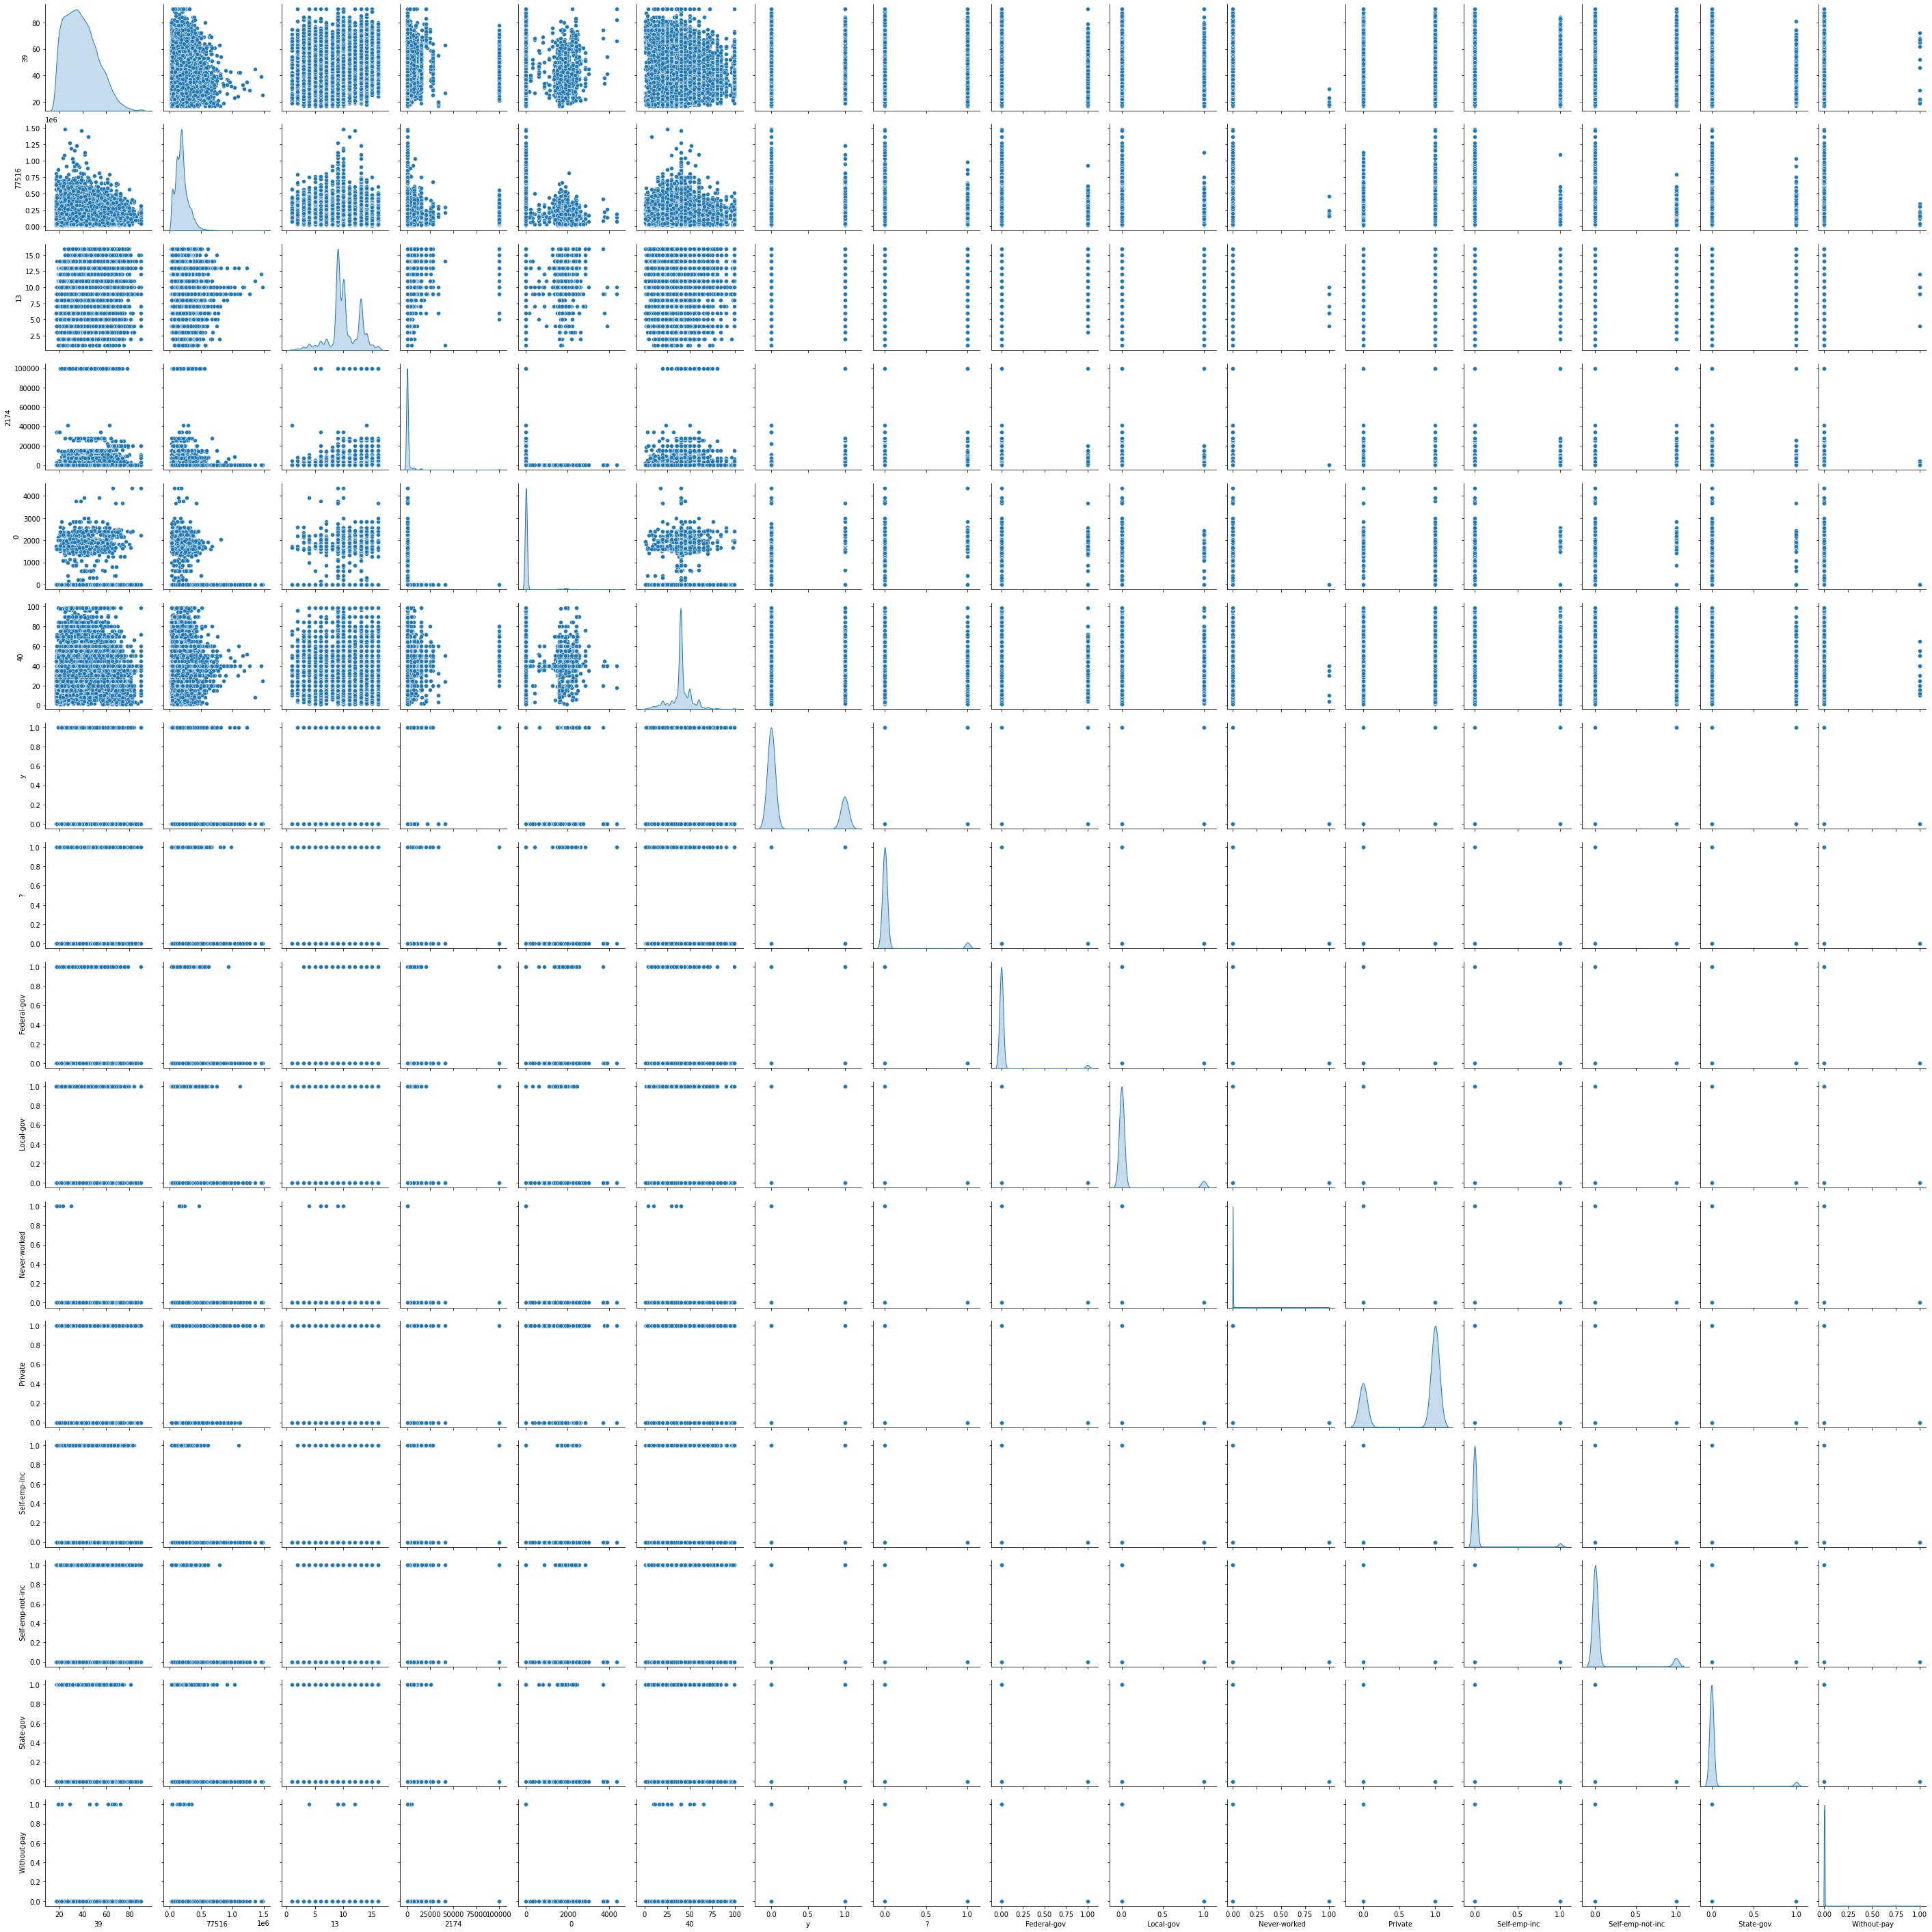

In [23]:
sn.pairplot(data=df, diag_kind='kde')

In [24]:
df.describe()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817,0.056388,0.029484,0.064281,0.000215,0.697052,0.034275,0.078041,0.039834,0.000430
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586,0.230673,0.169161,0.245257,0.014661,0.459540,0.181938,0.268239,0.195572,0.020732
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

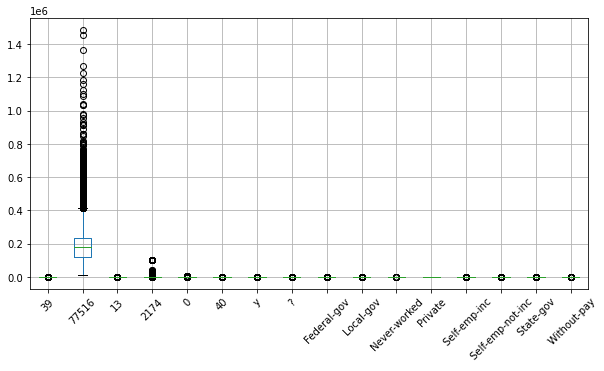

In [25]:
df.boxplot(rot=45, figsize=(10,5))

In [26]:
df.shape

(32560, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   39                 32560 non-null  int64
 1   77516              32560 non-null  int64
 2   13                 32560 non-null  int64
 3   2174               32560 non-null  int64
 4   0                  32560 non-null  int64
 5   40                 32560 non-null  int64
 6   y                  32560 non-null  int64
 7    ?                 32560 non-null  uint8
 8    Federal-gov       32560 non-null  uint8
 9    Local-gov         32560 non-null  uint8
 10   Never-worked      32560 non-null  uint8
 11   Private           32560 non-null  uint8
 12   Self-emp-inc      32560 non-null  uint8
 13   Self-emp-not-inc  32560 non-null  uint8
 14   State-gov         32560 non-null  uint8
 15   Without-pay       32560 non-null  uint8
dtypes: int64(7), uint8(9)
memory usage: 2.0 MB


In [28]:
df.skew()   # Checking for skewness before feature scaling

39                    0.558738
77516                 1.446972
13                   -0.311630
2174                 11.953690
0                     4.594549
40                    0.227636
y                     1.212383
 ?                    3.846469
 Federal-gov          5.563263
 Local-gov            3.553376
 Never-worked        68.182528
 Private             -0.857656
 Self-emp-inc         5.119915
 Self-emp-not-inc     3.146333
 State-gov            4.706125
 Without-pay         48.196771
dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

### Train/Test Split and Feature Scaling

In [30]:
y_values = df['y']  # taking out the y values from the dataset

In [31]:
data = df.drop('y', axis = 1)   # taking out the y values from the dataset

In [32]:
def feature_scaling(dataframe,column):
    """
    
    Args:
        dataframe (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [33]:
column = ['77516','2174','13','39','40','0']
for item in column:
    data[item] = data[item].astype(float)
for item in column:
    data[item] = feature_scaling(data,item)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, y_values, test_size = 0.3)    # We are splitting the data into training and testing sets in 70:30 ratio

### Formula for Sigmoid function

In [35]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Args: z (ndarray): A scalar, numpy array of any size.
    Returns: g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1+np.exp(-z))
    return g

In [36]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw  

## Logistic Gradient Descent

The gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously 


In [37]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    w = copy.deepcopy(w_in) 
    b = b_in    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
    return w, b     

In [38]:
y_train1 = np.array(y_train)

In [39]:
X_train1 = np.array(X_train)

In [40]:
try:
    w_tmp  = np.zeros_like(X_train1[0])
    b_tmp  = 0.
    alph = 0.01
    iters = 1000
    w_out, b_out = gradient_descent(X_train1, y_train1, w_tmp, b_tmp, alph, iters) 
    print(f"\nupdated parameters: w:{w_out}, b:{b_out}")
except Exception as e:
    print(f"Error : {e}")


updated parameters: w:[ 3.85055096e-01  3.64529295e-02  5.64069358e-01  4.28272670e-01
  2.20637487e-01  3.56193700e-01 -1.16261203e-01 -1.27913509e-02
 -7.08296097e-02 -4.66065291e-04 -4.84901027e-01  2.22501187e-02
 -1.02581992e-01 -4.50052832e-02 -1.31765933e-03], b:-0.8119040708430344


In [41]:
def predict(x, w, b): 
    """
    single predict using logistic regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    final = sigmoid(p)     
    return final  

In [42]:
try:
    x_test = np.array(X_test)
    y_expected = np.array(y_test)
    y_test = np.array([predict(i, w_out, b_out) for i in x_test])
except Exception as e:
    print(f'Error : {e}')

In [43]:
y_expected[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [44]:
y_test_1 = [1.0 if i>0.5 else 0.0 for i in list(y_test)]

In [45]:
y_test_1 = np.array(y_test_1)
print(y_test_1)

[0. 0. 0. ... 0. 0. 0.]


In [46]:
# function to check the accuracy of the prediction
def accuracy_check(y_predicted, y_data):
        p, e = y_predicted, y_data
        n = len(y_predicted)
        return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

In [47]:
print(f'The accuracy is : {accuracy_check(y_expected, y_test_1)*100} %')

The accuracy is : 96.47829647829647 %
